In [1]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8 model
model = YOLO(r"C:\Users\arees\OneDrive\Desktop\Object_Tracking_Tello\tello\drone_project\yolov8s.pt")  # You can use 'yolov8s.pt' for better accuracy


In [2]:
import cv2
import torch
import numpy as np
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import os


In [ ]:
import cv2
import os
import shutil
import random
import time

# Define dataset paths
dataset_path = "data/areesha/images"
train_path = os.path.join(dataset_path, "train")
val_path = os.path.join(dataset_path, "val")

# Ensure directories exist
os.makedirs(dataset_path, exist_ok=True)
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)

# Start webcam capture
cap = cv2.VideoCapture(0)
image_count = 0
collected_images = []
max_images = 100  # Set the max number of images
delay = 2  # Time gap in seconds

print("📸 Capturing 500 images automatically. Please face the camera.")

while image_count < max_images:
    ret, frame = cap.read()
    if not ret:
        print("❌ Camera not detected!")
        break

    img_name = f"face_{image_count}.jpg"
    img_path = os.path.join(dataset_path, img_name)
    cv2.imwrite(img_path, frame)
    collected_images.append(img_name)

    print(f"✅ Image {image_count+1}/{max_images} captured.")

    image_count += 1
    time.sleep(delay)  # Wait for 2 seconds

print("🎯 Image capture complete! Splitting dataset...")

cap.release()
cv2.destroyAllWindows()

# ---------------- Step 2: Split Images into Train and Val ---------------- #

# Shuffle images to randomize
random.shuffle(collected_images)

# Define split ratio (80% train, 20% val)
split_idx = int(0.8 * len(collected_images))

# Move images to train folder
for img in collected_images[:split_idx]:
    shutil.move(os.path.join(dataset_path, img), os.path.join(train_path, img))

# Move images to val folder
for img in collected_images[split_idx:]:
    shutil.move(os.path.join(dataset_path, img), os.path.join(val_path, img))

print(f"✅ Dataset split complete! Moved {split_idx} images to train and {len(collected_images) - split_idx} images to val.")


In [ ]:
!yolo train data="data/areesha.yaml" model="yolov8s.pt" epochs=50 imgsz=416 batch=2 device=cpu project=runs name=detect_train save=True


^C


In [4]:
!yolo val model="C:\Users\arees\OneDrive\Desktop\Object_Tracking_Tello\tello\drone_project\runs\detect_train\weights\best.pt" data="data/areesha.yaml" device=cpu


Ultralytics 8.3.35 🚀 Python-3.12.4 torch-2.6.0+cpu CPU (11th Gen Intel Core(TM) i5-1135G7 2.40GHz)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
                   all         20         20      0.997          1      0.995      0.804
Speed: 3.2ms preprocess, 186.6ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs\detect\val2
💡 Learn more at https://docs.ultralytics.com/modes/val



val: Scanning C:\Users\arees\OneDrive\Desktop\Object_Tracking_Tello\tello\drone_project\data\areesha\labels\val.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
val: Scanning C:\Users\arees\OneDrive\Desktop\Object_Tracking_Tello\tello\drone_project\data\areesha\labels\val.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:02<00:02,  2.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  1.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.10s/it]


In [5]:
# Load trained YOLO model
model_path = r"C:\Users\arees\OneDrive\Desktop\Object_Tracking_Tello\tello\drone_project\runs\detect_train\weights\best.pt"  # Update this if needed
model = YOLO(model_path)

# Check if model loads properly
print("Model loaded successfully!")


Model loaded successfully!


In [6]:
# Load the image
image_path = r"C:\Users\arees\OneDrive\Desktop\Object_Tracking_Tello\tello\drone_project\data\areesha\images\train\face_6.jpg"  # Change this to your test image path
image = Image.open(image_path)

# Run YOLO on the image
results = model(image)

# Show results
for result in results:
    result.show()  # Show detections



0: 320x416 1 areesha, 175.8ms
Speed: 0.0ms preprocess, 175.8ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)


In [9]:
# Open webcam (0 = default camera)
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLO on the frame
    results = model(frame)

    # Draw bounding boxes
    for result in results:
        annotated_frame = result.plot()

    # Show frame
    cv2.imshow("YOLO Detection", annotated_frame)

    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Cleanup
cap.release()
cv2.destroyAllWindows()


0: 320x416 (no detections), 123.5ms
Speed: 17.6ms preprocess, 123.5ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 134.2ms
Speed: 3.9ms preprocess, 134.2ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 106.4ms
Speed: 3.3ms preprocess, 106.4ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 92.9ms
Speed: 0.0ms preprocess, 92.9ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 101.7ms
Speed: 0.0ms preprocess, 101.7ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 94.8ms
Speed: 2.7ms preprocess, 94.8ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 90.2ms
Speed: 0.0ms preprocess, 90.2ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 106.8ms
Speed: 0.0ms preprocess

In [7]:
model = YOLO(r"C:\Users\arees\OneDrive\Desktop\Object_Tracking_Tello\tello\drone_project\runs\detect_train\weights\best.pt")  # Load the trained model


In [13]:
!pip install onnx


In [16]:
# Save as .PT (PyTorch format) for YOLOv8 tracking on Tello drone
pt_model_path = r"C:\Users\arees\OneDrive\Desktop\Object_Tracking_Tello\tello\drone_project\local\YoloV8Tracker_model.pt"
model.export(format="torchscript")  # Export to TorchScript
model.save(pt_model_path)  # Save the model
print(f"Model saved successfully at: {pt_model_path}")


Ultralytics 8.3.35  Python-3.12.4 torch-2.6.0+cpu CPU (11th Gen Intel Core(TM) i5-1135G7 2.40GHz)

PyTorch: starting from 'C:\Users\arees\OneDrive\Desktop\Object_Tracking_Tello\tello\drone_project\runs\detect_train\weights\best.pt' with input shape (1, 3, 416, 416) BCHW and output shape(s) (1, 5, 3549) (21.4 MB)

TorchScript: starting export with torch 2.6.0+cpu...
TorchScript: export success  2.8s, saved as 'C:\Users\arees\OneDrive\Desktop\Object_Tracking_Tello\tello\drone_project\runs\detect_train\weights\best.torchscript' (42.8 MB)

Export complete (3.2s)
Results saved to C:\Users\arees\OneDrive\Desktop\Object_Tracking_Tello\tello\drone_project\runs\detect_train\weights
Predict:         yolo predict task=detect model=C:\Users\arees\OneDrive\Desktop\Object_Tracking_Tello\tello\drone_project\runs\detect_train\weights\best.torchscript imgsz=416  
Validate:        yolo val task=detect model=C:\Users\arees\OneDrive\Desktop\Object_Tracking_Tello\tello\drone_project\runs\detect_train\weigh

In [17]:
# Load the saved model
pt_model_path = r"C:\Users\arees\OneDrive\Desktop\Object_Tracking_Tello\tello\drone_project\local\YoloV8Tracker_model.pt"
model = YOLO(pt_model_path)  # Load the trained model
print("✅ Model loaded successfully!")


✅ Model loaded successfully!



image 1/1 C:\Users\arees\OneDrive\Desktop\Object_Tracking_Tello\tello\drone_project\data\areesha\images\val\face_13.jpg: 320x416 1 areesha, 266.3ms
Speed: 17.9ms preprocess, 266.3ms inference, 13.1ms postprocess per image at shape (1, 3, 320, 416)


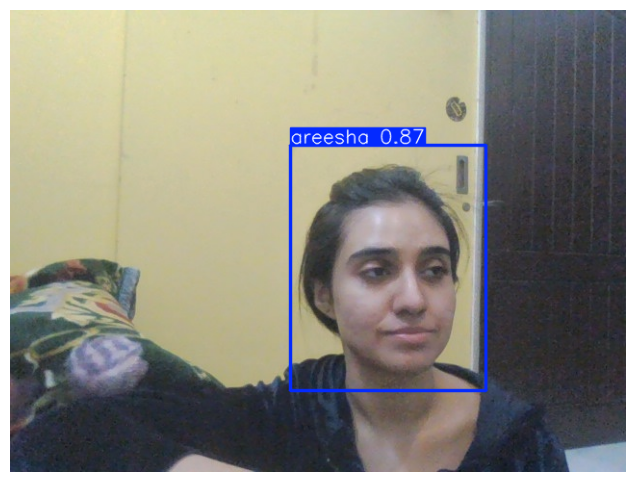

In [18]:
import cv2
import matplotlib.pyplot as plt

# Path to test image
image_path = r"C:\Users\arees\OneDrive\Desktop\Object_Tracking_Tello\tello\drone_project\data\areesha\images\val\face_13.jpg"

# Run inference
results = model(image_path)

# Display results
for result in results:
    img = result.plot()  # Get the image with bounding boxes
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()


In [19]:
import cv2

# Open webcam
cap = cv2.VideoCapture(0)  # Change to video file path if using a pre-recorded video

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLO model on the frame
    results = model(frame)

    # Draw bounding boxes
    for result in results:
        frame = result.plot()

    # Show the output
    cv2.imshow("YOLOv8 Detection", frame)

    # Press 'Q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()



0: 320x416 (no detections), 213.2ms
Speed: 0.0ms preprocess, 213.2ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 141.7ms
Speed: 2.0ms preprocess, 141.7ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 (no detections), 158.0ms
Speed: 3.0ms preprocess, 158.0ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 areesha, 158.2ms
Speed: 2.2ms preprocess, 158.2ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 areesha, 142.3ms
Speed: 5.3ms preprocess, 142.3ms inference, 16.3ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 areesha, 132.4ms
Speed: 4.2ms preprocess, 132.4ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 areesha, 158.2ms
Speed: 3.7ms preprocess, 158.2ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 416)

0: 320x416 1 areesha, 180.5ms
Speed: 4.1ms preprocess, 180.5ms inference, 1.4